### En este Jupyter voy a cargar los datos y voy a realizar la limpieza de los datos y su posterior analisis.

In [2]:
# Cargamos las librerias.
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('../../../Panda/Laboratorio_Python/df_unido.csv')
df

,CODIGO ORGANO SUPERIOR,NOMBRE ORGANO SUPERIOR,CODIGO ORGANO,NOMBRE ORGANO,CODIGO UNIDAD GESTORA,NOMBRE UNIDAD GESTORA,CATEGORIA ECONOMICA,ORIGEN INGRESO,TIPO INGRESO,DETALLE,VALOR PREVISTO ACTUALIZADO,VALOR REGISTRADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA REGISTRO,AÑO EJERCICIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,"0,00","0,00","1297,13","0,00",2013-12-31 00:00:00,2013
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,"0,00","0,00","26666621,42","0,00",2013-12-31 00:00:00,2013
2,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",OUTRAS MULTAS E JUROS DE MORA,"0,00","0,00","301251,13","0,00",2013-12-31 00:00:00,2013
3,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIV.ATIVA POR INFRAÇÃO ADMINISTRATIVA,"0,00","0,00","1855,58","0,00",2013-12-31 00:00:00,2013
4,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",OUTRAS RESTITUICOES,"0,00","0,00","52140,68","0,00",2013-12-31 00:00:00,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026294,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,243001,INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI,Receitas de Capital,Operações de Crédito,Operações de crédito - mercado interno,TITULOS DE RESPONS.TES.NAC.-MERC.INT.-PRINC.,"16940891,00","0,00","0,00","0,00",23/04/2021,2021
1026295,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,243001,INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,"SERV.DE REGIST.,CERTIF.E FISCALIZ.-PRINCIPAL","0,00","0,00","372,90","0,00",22/11/2021,2021
1026296,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,243001,INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,"SERV.DE REGIST.,CERTIF.E FISCALIZ.-PRINCIPAL","200000,00","0,00","0,00","0,00",23/04/2021,2021
1026297,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,243001,INSTITUTO NAC.DE TECNOLOGIA DA INFORMACAO ITI,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,"SERV.DE REGIST.,CERTIF.E FISCALIZ.-PRINCIPAL","0,00","0,00","1000000,00","0,00",10/05/2021,2021


In [4]:
# Miro si hay columnas con datos nulos y que me  los muestre
df.columns.isnull().sum()

np.int64(0)

In [5]:
# Miro si hay columnas con datos duplicados y  que me los muestre
df.columns.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026299 entries, 0 to 1026298
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   CODIGO ORGANO SUPERIOR      1026299 non-null  int64 
 1   NOMBRE ORGANO SUPERIOR      1026299 non-null  object
 2   CODIGO ORGANO               1026299 non-null  int64 
 3   NOMBRE ORGANO               1026299 non-null  object
 4   CODIGO UNIDAD GESTORA       1026299 non-null  int64 
 5   NOMBRE UNIDAD GESTORA       1026299 non-null  object
 6   CATEGORIA ECONOMICA         1026299 non-null  object
 7   ORIGEN INGRESO              1026299 non-null  object
 8   TIPO INGRESO                1026299 non-null  object
 9   DETALLE                     1026299 non-null  object
 10  VALOR PREVISTO ACTUALIZADO  1026299 non-null  object
 11  VALOR REGISTRADO            1026299 non-null  object
 12  VALOR REALIZADO             1026299 non-null  object
 13  PORCENTAJE R

### Analizo con Info y veo que los datos monetarios no estan en tipo int por lo que decido cambiarlos.


In [7]:
# Convertir las columnas monetarias a tipo numérico
columnas_monetarias = ['VALOR PREVISTO ACTUALIZADO', 'VALOR REGISTRADO', 'VALOR REALIZADO', 'PORCENTAJE REALIZADO']
columnas_monetarias


['VALOR PREVISTO ACTUALIZADO',
 'VALOR REGISTRADO',
 'VALOR REALIZADO',
 'PORCENTAJE REALIZADO']

In [8]:
# Eliminar posibles símbolos de moneda y comas, luego convertir a float
for col in columnas_monetarias:
    df[col] = df[col].replace({r'[^\d.]': ''}, regex=True).astype(float)


In [10]:
# Convertir la columna de fecha a tipo datetime
#df['FECHA REGISTRO'] = pd.to_datetime(df['FECHA REGISTRO'], errors='coerce')
df['FECHA REGISTRO'] = pd.to_datetime(df['FECHA REGISTRO'], format="mixed")

In [11]:
# Verificar que las conversiones se han realizado correctamente
print(df.dtypes)





CODIGO ORGANO SUPERIOR                 int64
NOMBRE ORGANO SUPERIOR                object
CODIGO ORGANO                          int64
NOMBRE ORGANO                         object
CODIGO UNIDAD GESTORA                  int64
NOMBRE UNIDAD GESTORA                 object
CATEGORIA ECONOMICA                   object
ORIGEN INGRESO                        object
TIPO INGRESO                          object
DETALLE                               object
VALOR PREVISTO ACTUALIZADO           float64
VALOR REGISTRADO                     float64
VALOR REALIZADO                      float64
PORCENTAJE REALIZADO                 float64
FECHA REGISTRO                datetime64[ns]
AÑO EJERCICIO                          int64
dtype: object


In [12]:
# Identifico si hay valores nulos en las columnas.
print(df.isnull().sum())  

CODIGO ORGANO SUPERIOR          0
NOMBRE ORGANO SUPERIOR          0
CODIGO ORGANO                   0
NOMBRE ORGANO                   0
CODIGO UNIDAD GESTORA           0
NOMBRE UNIDAD GESTORA           0
CATEGORIA ECONOMICA             0
ORIGEN INGRESO                  0
TIPO INGRESO                    0
DETALLE                         0
VALOR PREVISTO ACTUALIZADO      0
VALOR REGISTRADO                0
VALOR REALIZADO                 0
PORCENTAJE REALIZADO            0
FECHA REGISTRO                578
AÑO EJERCICIO                   0
dtype: int64


In [13]:
#### Veo que la columna Fecha de registro tiene 578 valores nulos. 
valores_unicos = df['FECHA REGISTRO']
valores_unicos

0         2013-12-31
1         2013-12-31
2         2013-12-31
3         2013-12-31
4         2013-12-31
             ...    
1026294   2021-04-23
1026295   2021-11-22
1026296   2021-04-23
1026297   2021-10-05
1026298   2021-03-23
Name: FECHA REGISTRO, Length: 1026299, dtype: datetime64[ns]

   - Revisar posibles inconsistencias en las categorías económicas (errores tipográficos, variaciones en los nombres) y unificarlas.



In [14]:
# Reviso la categoria Economica para ver si hay valores que pueda unificar.
categorias_unicas = df['CATEGORIA ECONOMICA'].unique()
print(categorias_unicas)


['Receitas Correntes' 'Receitas de Capital'
 'Receitas Correntes - intra-orçamentárias' 'Sem informação'
 'Receitas de Capital - intra-orçamentárias']


In [15]:
# Hago un value counts para revisarla y veo que hay datos que puedo unificar
frecuencias = df['CATEGORIA ECONOMICA'].value_counts()
print(frecuencias)


CATEGORIA ECONOMICA
Receitas Correntes                           979596
Receitas de Capital                           30116
Receitas Correntes - intra-orçamentárias      16235
Sem informação                                  257
Receitas de Capital - intra-orçamentárias        95
Name: count, dtype: int64


In [21]:
# Cambio los nombres a Receitas corrientes de los valores que he identificado que podia unir.
df['CATEGORIA ECONOMICA'] = df['CATEGORIA ECONOMICA'].replace({
    'Receitas Correntes': 'Receitas Correntes',
    'receitas correntes': 'Receitas Correntes',
    'Rec Correntes': 'Receitas Correntes'})


In [25]:
# Hago un print para comprobar que se me han quedado menos valores unicos.
print(df['CATEGORIA ECONOMICA'].value_counts())


CATEGORIA ECONOMICA
RECEITAS CORRENTES                           979596
Receitas de Capital                           30116
Receitas Correntes - intra-orçamentárias      16235
Sem informação                                  257
Receitas de Capital - intra-orçamentárias        95
Name: count, dtype: int64


   - Analizar las categorías de ingresos más significativas y su participación en los ingresos totales.


In [27]:
# Hago un analisis sobre la categoria economica y el valor realizado.
ingresos_por_categoria = df.groupby('CATEGORIA ECONOMICA')['VALOR REALIZADO'].sum().reset_index()
ingresos_por_categoria

,CATEGORIA ECONOMICA,VALOR REALIZADO
0,RECEITAS CORRENTES,1.433421e+15
1,Receitas Correntes - intra-orçamentárias,2.928975e+13
2,Receitas de Capital,1.278346e+15
3,Receitas de Capital - intra-orçamentárias,2.826909e+12
4,Sem informação,4.657000e+03


In [30]:
# Aqui hago una suma de los valores realizados y luego creo una columna nueva y hago la particion para que me saque los valores dividos los ingresos totales.
ingresos_totales = ingresos_por_categoria['VALOR REALIZADO'].sum()
ingresos_por_categoria['PARTICIPACION'] = (ingresos_por_categoria['VALOR REALIZADO'] / ingresos_totales) * 100
ingresos_por_categoria

,CATEGORIA ECONOMICA,VALOR REALIZADO,PARTICIPACION
0,RECEITAS CORRENTES,1.433421e+15,5.224058e+01
1,Receitas Correntes - intra-orçamentárias,2.928975e+13,1.067456e+00
2,Receitas de Capital,1.278346e+15,4.658894e+01
3,Receitas de Capital - intra-orçamentárias,2.826909e+12,1.030258e-01
4,Sem informação,4.657000e+03,1.697229e-10


In [31]:
# Aqui ordeno de mayor a menor para que para que muestre mejor los resultados.
ingresos_por_categoria = ingresos_por_categoria.sort_values(by='VALOR REALIZADO', ascending=False)
print(ingresos_por_categoria)



                         CATEGORIA ECONOMICA  VALOR REALIZADO  PARTICIPACION
0                         RECEITAS CORRENTES     1.433421e+15   5.224058e+01
2                        Receitas de Capital     1.278346e+15   4.658894e+01
1   Receitas Correntes - intra-orçamentárias     2.928975e+13   1.067456e+00
3  Receitas de Capital - intra-orçamentárias     2.826909e+12   1.030258e-01
4                             Sem informação     4.657000e+03   1.697229e-10


In [32]:
import matplotlib.pyplot as plt


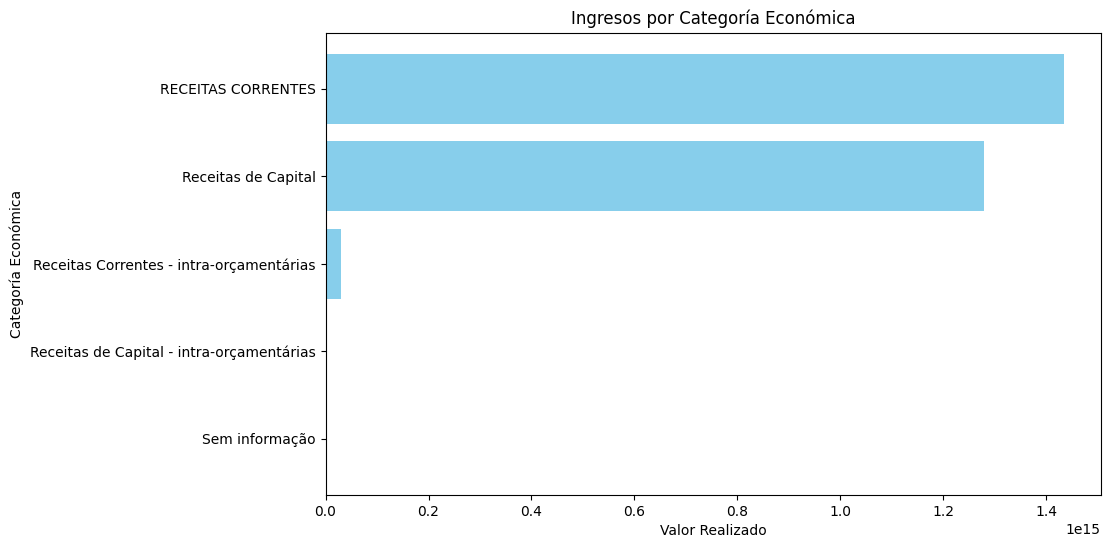

In [33]:
# Hago un grafico para representar la diferencia entre los diferentes ingresos por categoria.

plt.figure(figsize=(10, 6))
plt.barh(ingresos_por_categoria['CATEGORIA ECONOMICA'], ingresos_por_categoria['VALOR REALIZADO'], color='skyblue')
plt.xlabel("Valor Realizado")
plt.ylabel("Categoría Económica")
plt.title("Ingresos por Categoría Económica")
plt.gca().invert_yaxis()
plt.show()